## New York City Taxi Trip Prediction

## Import the libraries
Import Necessary Libraries To ensure the necessary libraries are installed correctly and up-to-date, print the version numbers for each library. This will also improve the reproducibility of our project.

In [1]:
import sys    #for python version
import sklearn
import pandas
import numpy
import seaborn
import matplotlib

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Numpy: {}'.format(numpy.__version__))
print('seaborn: {}'.format(seaborn.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Scikit-learn: 0.22.1
Pandas: 1.0.1
Numpy: 1.18.1
seaborn: 0.10.0
matplotlib: 3.1.3


## Exploratory data analysis

### Import libraries for EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')
import seaborn as sns


# To ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

### Load the dataset

In [3]:
#import the dataset from the location
df=pd.read_csv('taxifare.csv')

In [4]:
#shape of dataset with rows and columns
print("Input data has {} rows and {} col".format(len(df),len(df.columns)))

Input data has 120000 rows and 8 col


In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
#preview of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB
None


## All About data

- <b>pickup_datetime</b> - timestamp value indicating when the taxi ride started.
- <b>fare_amount</b> - dollar amount of the cost of the taxi ride 
- <b>fare_class</b> - divide into 0 and 1's
- <b>pickup_longitude</b> - float for longitude coordinate of where the taxi ride started.
- <b>pickup_latitude</b> - float for latitude coordinate of where the taxi ride started.
- <b>dropoff_longitude</b> - float for longitude coordinate of where the taxi ride ended.
- <b>dropoff_latitude</b> - float for latitude coordinate of where the taxi ride ended.
- <b>passenger_count</b> - integer indicating the number of passengers in the taxi ride

- Here if we choose target variable as <b>fare_amuont</b> we perform <b>regression</b> problem or if we choose target as <b>fare_class</b> we do <b>classification</b>.

Now from the variable pickup_datetime it is given in UTC format to get into Indian time we use a inbuilt function name as time delta and we also need to subtract it from 4 hour to get in to our time zone.

In [7]:
# Feature engineering for datetime

In [8]:
import datetime

In [9]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB
None


- Now pickup_datetime has changed from object to datetime format we can extract the day, month, year and hours and min from the feature.
- For extracting we use dt.format,hence it extract easily

In [11]:
df['Year']=df['pickup_datetime'].dt.year

In [12]:
df['Month']=df['pickup_datetime'].dt.month

In [13]:
df['Day']=df['pickup_datetime'].dt.day

In [14]:
df['Hours']=df['pickup_datetime'].dt.hour

In [15]:
df['Minutes']=df['pickup_datetime'].dt.minute

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19


- As we extracted maximum features from pickup_datetime ,we can also derive a feature wheather the ride is done at night are morning from hours feature if it as greater than 12 it comes under one classification.
- If it is less than 12 it give as 0 else 1.

In [17]:
df['mornight']=np.where(df['Hours']<12,0,1)

In [18]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
0,2010-04-19 04:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0
1,2010-04-17 11:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0
2,2010-04-17 07:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0
3,2010-04-11 17:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1
4,2010-04-16 22:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1


Now we can drop pickup_datetime feature as we got more information from that feature.

In [19]:
df.drop('pickup_datetime',axis=1,inplace=True)

- Now we calculate the distance between pickup_longitude and dropoff_longitude and also other for better understanding and also for building the model.
- For this we have a function nmaed  Haversine Distance(which is for latitudes and longitudes) from we can calculate the distance.

- Compute the Haversine distance between samples in X and Y

- The Haversine (or great circle) distance is the angular distance between
two points on the surface of a sphere. The first distance of each point is
assumed to be the latitude, the second is the longitude, given in radians.
The dimension of the data must be 2.

   
Formula  
    D(x, y) = 2arcsin[sqrt{sin^2((x1 - y1) / 2)+ cos(x1)cos(y1)sin^2((x2 - y2) / 2)}]
    

In [20]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

In [21]:
def haversine(df):
   
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [22]:
df['Total distance']=haversine(df)

In [23]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,4,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,11,43,0,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,7,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,17,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,16,22,19,1,7.231321


Now we can drop the columns as we came to get the distance between them so we can drop it.

In [24]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [25]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


## Feature Selection

In [26]:
#spiltig into dependent and independent variables
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [27]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

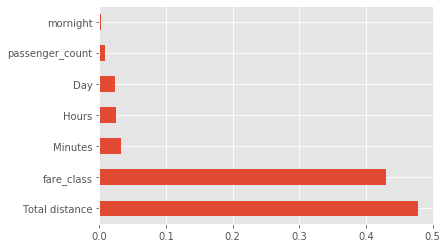

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

## Building the Regression Model

In [32]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,1,2010,4,19,4,17,0,2.126312
1,6.9,0,1,2010,4,17,11,43,0,1.392307
2,10.1,1,2,2010,4,17,7,23,0,3.326763
3,8.9,0,1,2010,4,11,17,25,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,7.231321


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [34]:
#Import requried libraries for models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [35]:
models = []
models.append(('LR', LinearRegression()))
models.append(('RIDGE', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('ELN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('xgb', xgb.XGBRegressor()))
scoring = 'r2'
seed=5
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X,y,  cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.826781 (0.003086)
RIDGE: 0.826781 (0.003086)
LASSO: 0.801653 (0.004092)
ELN: 0.801203 (0.004053)
KNN: 0.805565 (0.005453)
DT: 0.750228 (0.009480)
RF: 0.871928 (0.003239)
[12:51:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb: 0.881659 (0.002919)


In [36]:
import xgboost

In [37]:
regressor=xgboost.XGBRegressor(n_estimators=1100,min_child_weight=6,max_depth=25,learning_rate=0.05)
regressor.fit(X_train,y_train)

[12:52:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=25, min_child_weight=6, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
y_pred=regressor.predict(X_test)

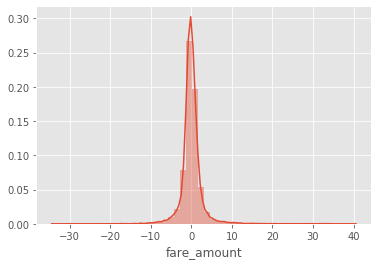

In [39]:
sns.distplot(y_test-y_pred)

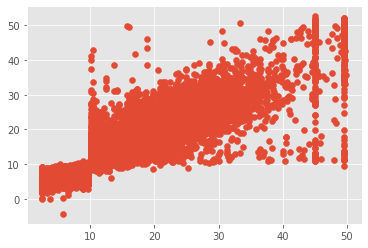

In [40]:
plt.scatter(y_test,y_pred)

In [41]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9281159246141872
MAE: 1.5477094500532746
MSE: 7.928781815870178
RMSE: 2.8158092648242667
